In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel("supplementary-data.xlsx")

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
data

,Sample,Water fraction [0-1],Rotational speed (rpm),Compression ratio,Ignition Advance Angle (°BTDC),Fuel temperature (℃),Exhaust temperature (℃),Oil temperature (℃),Torque (N m),Fuel consumption (g/s),Power (kW),Specific fuel consumption (g/kWh),Efficiency (%),CO (%),CO2 (%),O2 (%),HC (ppm),NOx (ppm)
0,1,0.0,2000,7.44,25.0,32.2,566.9,144.7,10.1,0.22,2.115339,374.408064,35.744154,0.93,7.4,14.9,56,483
1,2,0.0,2000,7.44,25.0,32.0,568.6,142.5,10.0,0.23,2.094395,395.340879,33.851545,0.95,7.5,14.8,57,483
2,3,0.0,2000,7.44,25.0,31.9,566.5,140.8,10.1,0.22,2.115339,374.408064,35.744154,0.96,7.4,14.8,59,480
3,4,0.0,2000,7.44,25.0,31.3,572.3,142.1,10.1,0.23,2.115339,391.426613,34.190061,0.89,7.8,14.3,46,575
4,5,0.0,2000,7.44,25.0,31.2,572.7,141.6,10.1,0.23,2.115339,391.426613,34.190061,0.85,7.7,14.3,45,567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,2,0.5,4000,9.44,63.0,30.4,661.1,70.2,9.3,1.16,3.895575,1071.985552,36.688030,0.68,11.9,12.5,1122,0
356,3,0.5,4000,9.44,63.0,30.4,661.5,69.7,9.8,1.13,4.105014,990.983125,39.686890,0.64,12.1,12.4,1010,0
357,4,0.5,4000,9.44,63.0,30.5,661.6,68.1,9.1,1.02,3.811799,963.324645,40.826359,0.68,12.0,12.4,1229,0
358,5,0.5,4000,9.44,63.0,30.7,659.4,69.5,9.3,1.02,3.895575,942.607986,41.723642,0.72,12.1,12.2,1116,0


In [5]:
data.drop(columns=['Sample'],axis=1,inplace=True)

In [6]:
data

,Water fraction [0-1],Rotational speed (rpm),Compression ratio,Ignition Advance Angle (°BTDC),Fuel temperature (℃),Exhaust temperature (℃),Oil temperature (℃),Torque (N m),Fuel consumption (g/s),Power (kW),Specific fuel consumption (g/kWh),Efficiency (%),CO (%),CO2 (%),O2 (%),HC (ppm),NOx (ppm)
0,0.0,2000,7.44,25.0,32.2,566.9,144.7,10.1,0.22,2.115339,374.408064,35.744154,0.93,7.4,14.9,56,483
1,0.0,2000,7.44,25.0,32.0,568.6,142.5,10.0,0.23,2.094395,395.340879,33.851545,0.95,7.5,14.8,57,483
2,0.0,2000,7.44,25.0,31.9,566.5,140.8,10.1,0.22,2.115339,374.408064,35.744154,0.96,7.4,14.8,59,480
3,0.0,2000,7.44,25.0,31.3,572.3,142.1,10.1,0.23,2.115339,391.426613,34.190061,0.89,7.8,14.3,46,575
4,0.0,2000,7.44,25.0,31.2,572.7,141.6,10.1,0.23,2.115339,391.426613,34.190061,0.85,7.7,14.3,45,567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.5,4000,9.44,63.0,30.4,661.1,70.2,9.3,1.16,3.895575,1071.985552,36.688030,0.68,11.9,12.5,1122,0
356,0.5,4000,9.44,63.0,30.4,661.5,69.7,9.8,1.13,4.105014,990.983125,39.686890,0.64,12.1,12.4,1010,0
357,0.5,4000,9.44,63.0,30.5,661.6,68.1,9.1,1.02,3.811799,963.324645,40.826359,0.68,12.0,12.4,1229,0
358,0.5,4000,9.44,63.0,30.7,659.4,69.5,9.3,1.02,3.895575,942.607986,41.723642,0.72,12.1,12.2,1116,0


In [7]:
data.describe()

,Water fraction [0-1],Rotational speed (rpm),Compression ratio,Ignition Advance Angle (°BTDC),Fuel temperature (℃),Exhaust temperature (℃),Oil temperature (℃),Torque (N m),Fuel consumption (g/s),Power (kW),Specific fuel consumption (g/kWh),Efficiency (%),CO (%),CO2 (%),O2 (%),HC (ppm),NOx (ppm)
count,360.00000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.25000,3000.000000,8.440000,40.406667,32.379444,620.841944,115.343333,10.720556,0.547972,3.383932,614.828863,40.027141,0.598417,10.044444,14.933889,288.783333,580.008333
std,0.17102,708.090925,1.001392,12.063299,2.142167,68.103633,29.696449,1.343475,0.229812,0.972213,302.443288,5.524576,0.127054,1.397639,1.389602,429.026108,689.211917
min,0.00000,2000.000000,7.440000,20.000000,29.500000,435.800000,63.900000,5.700000,0.210000,1.759292,264.992980,21.306346,0.160000,7.300000,12.200000,8.000000,0.000000
25%,0.10000,2500.000000,7.440000,32.750000,30.600000,571.000000,90.650000,10.200000,0.370000,2.426880,399.024179,37.197693,0.507500,8.900000,13.900000,50.000000,46.750000
50%,0.25000,3000.000000,8.440000,37.250000,32.100000,627.500000,120.150000,11.100000,0.510000,3.330088,506.701299,40.216421,0.600000,9.900000,15.100000,91.000000,350.000000
75%,0.40000,3500.000000,9.440000,45.000000,33.625000,677.800000,142.000000,11.600000,0.682500,4.141666,762.330858,43.693223,0.690000,11.300000,16.000000,323.000000,796.000000
max,0.50000,4000.000000,9.440000,75.000000,37.500000,767.500000,166.100000,12.500000,1.260000,5.235988,1845.883734,60.374638,0.960000,12.600000,18.200000,1917.000000,2804.000000


<Axes: >

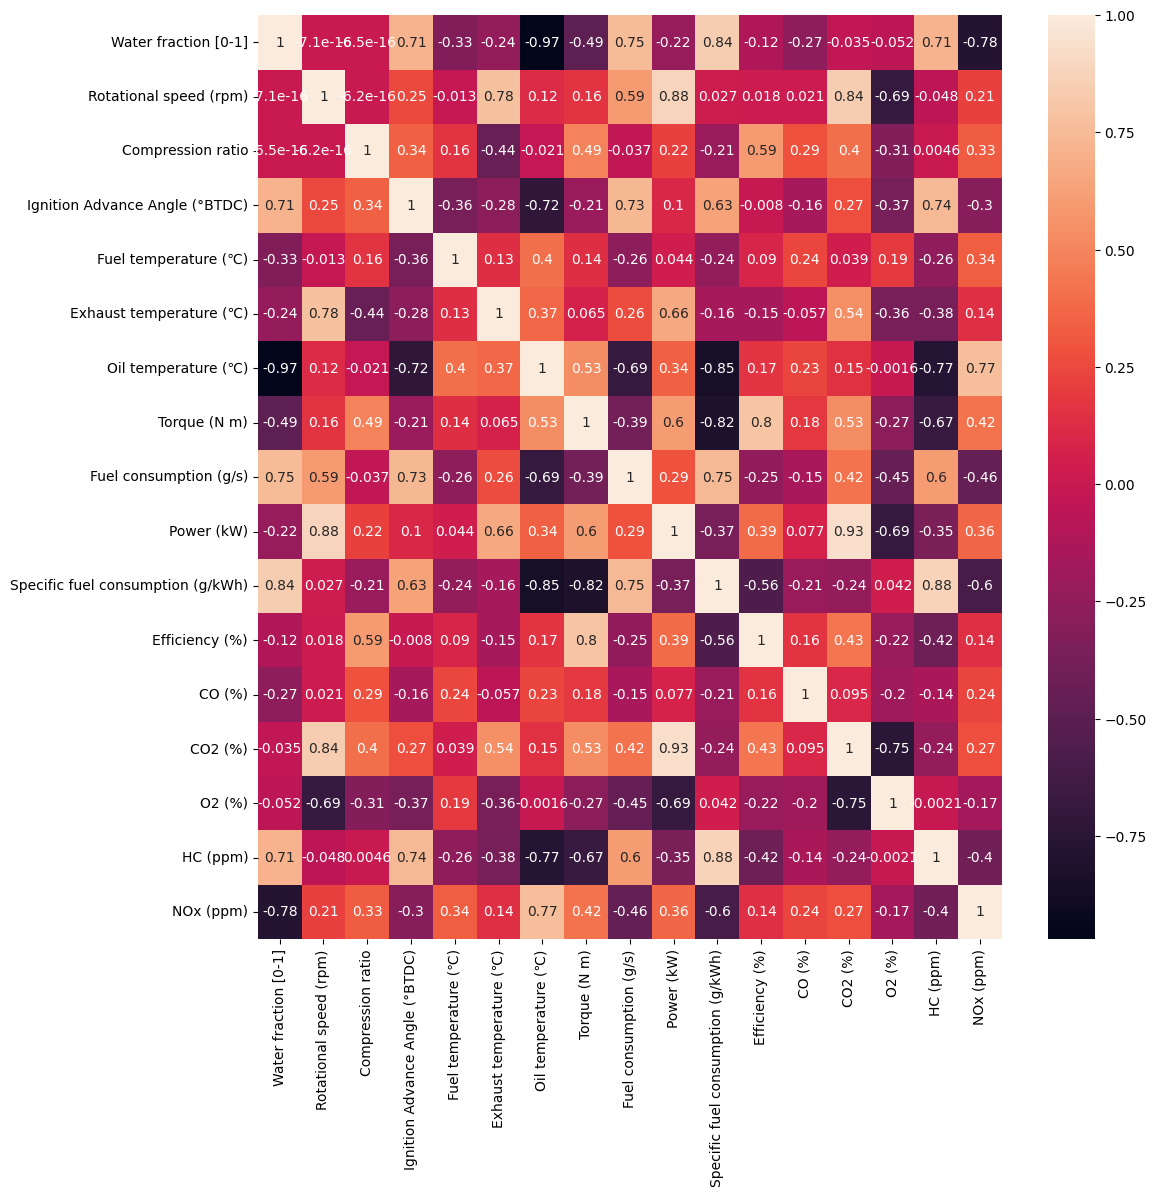

In [8]:
core=data.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(core,annot=True)

In [9]:
input_parameter=['Water fraction [0-1]','Rotational speed (rpm)','Compression ratio','Ignition Advance Angle (°BTDC)']
output_parameter=['Torque (N m)','Fuel consumption (g/s)']

In [10]:
x=data[input_parameter]
y=data[output_parameter]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

R² Score: 0.931
MAE: 0.113
RMSE: 0.211


In [14]:
feature_importance = model.feature_importances_

# Create a DataFrame
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)

                          Feature  Importance
0            Water fraction [0-1]    0.497153
2               Compression ratio    0.215327
3  Ignition Advance Angle (°BTDC)    0.184485
1          Rotational speed (rpm)    0.103035


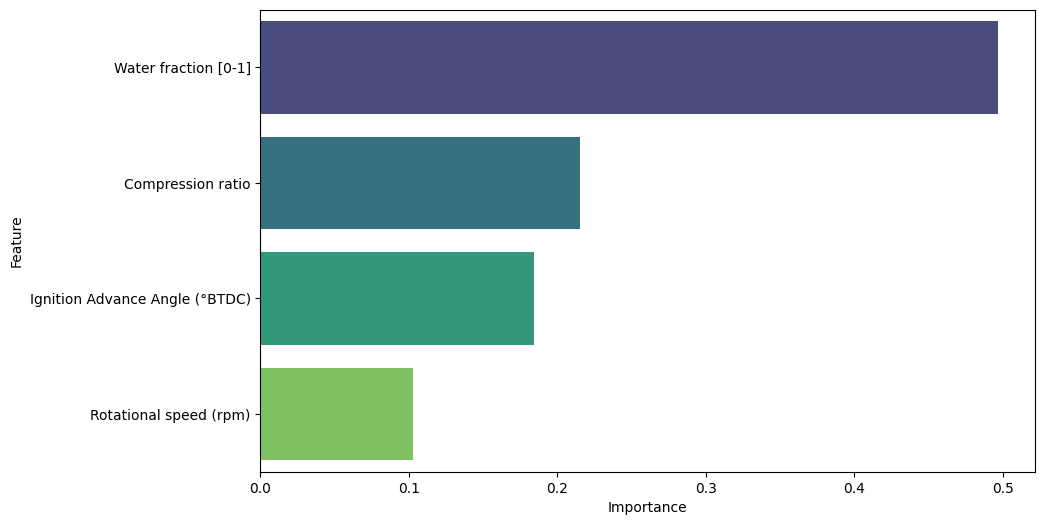

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_df['Importance'], y=feature_df['Feature'], palette='viridis')
plt.savefig('Torque_Imp')

In [16]:
water_fraction=float(input("water fraction :"))

water fraction :0.3


In [17]:
Rotational_speed=float(input("Rotational speed (rpm) :"))

Rotational speed (rpm) :3000


In [18]:
Compression_ratio=float(input("Compression ratio :"))

Compression ratio :7.44


In [19]:
BTDC=float(input("Ignition Advance Angle (°BTDC) :"))

Ignition Advance Angle (°BTDC) :33.0


In [20]:
Torque,Fuel_consumption=model.predict([[water_fraction, Rotational_speed, Compression_ratio, BTDC]]).flatten()

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [21]:
Torque

10.600000000000012

In [22]:
Fuel_consumption

0.5563211868686863

In [23]:
Rotational_speed = float(Rotational_speed)

In [24]:
def BP(Rotational_speed,Torque):
    Brake_Power=(Torque*2*3.14159*Rotational_speed)/60000
    return Brake_Power

In [25]:
Brake_Power=BP(Rotational_speed,Torque)

In [26]:

def SFC(Fuel_consumption,Brake_Power):
    Specific_fuel_consumption=Fuel_consumption*3600/Brake_Power
    return Specific_fuel_consumption

In [27]:
Specific_fuel_consumption=SFC(Fuel_consumption,Brake_Power)

In [28]:
Brake_Power,Specific_fuel_consumption

(3.3300854000000037, 601.4128865065347)

In [29]:
input_parameter1=['Water fraction [0-1]','Rotational speed (rpm)','Compression ratio','Ignition Advance Angle (°BTDC)','Torque (N m)','Fuel consumption (g/s)','Power (kW)','Specific fuel consumption (g/kWh)']
output_parameter1=['Efficiency (%)']

In [30]:
x1=data[input_parameter1]
y1=data[output_parameter1]

In [31]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model1.fit(X_train1, y_train1)

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [33]:
feature_importance1 = model1.feature_importances_

# Create a DataFrame
feature_df1 = pd.DataFrame({'Feature': X_train1.columns, 'Importance': feature_importance1})
feature_df1 = feature_df1.sort_values(by='Importance', ascending=False)
print(feature_df1)

                             Feature  Importance
4                       Torque (N m)    0.529428
7  Specific fuel consumption (g/kWh)    0.228765
2                  Compression ratio    0.122884
0               Water fraction [0-1]    0.071144
5             Fuel consumption (g/s)    0.019320
3     Ignition Advance Angle (°BTDC)    0.013936
6                         Power (kW)    0.011691
1             Rotational speed (rpm)    0.002832


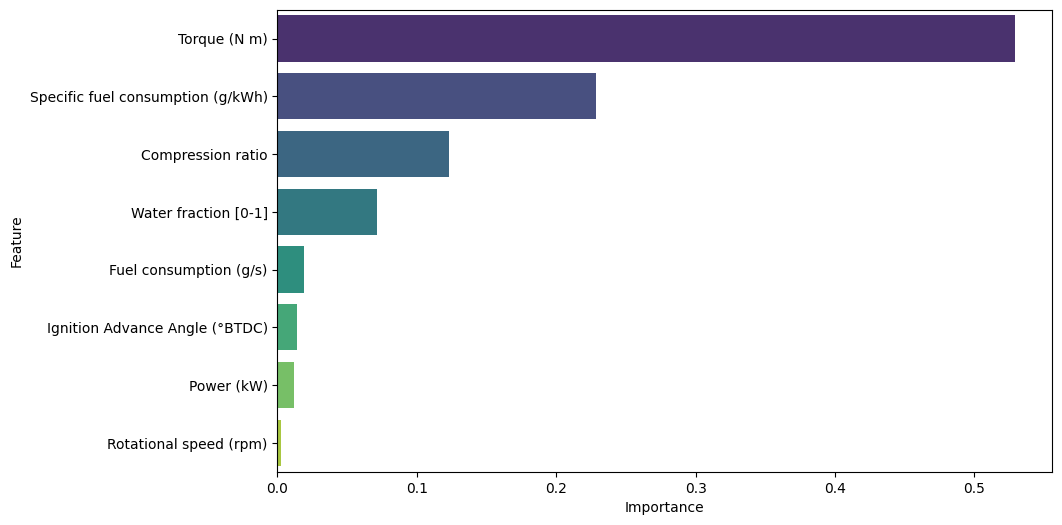

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_df1['Importance'], y=feature_df1['Feature'], palette='viridis')
plt.savefig('Efficiency_Imp')

In [35]:
y_pred1 = model1.predict(X_test1)

# Evaluate the model
r21 = r2_score(y_test1, y_pred1)
mae1 = mean_absolute_error(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = np.sqrt(mse1)

print(f"R² Score: {r21:.3f}")
print(f"MAE: {mae1:.3f}")
print(f"RMSE: {rmse1:.3f}")

R² Score: 0.910
MAE: 0.912
RMSE: 1.322


In [36]:
Efficiency=float(model1.predict([[water_fraction, Rotational_speed, Compression_ratio, BTDC,Torque,Fuel_consumption,Brake_Power,Specific_fuel_consumption]]))

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\gaura\AppData\Local\Temp\ipykernel_12336\2236271947.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Efficiency=float(model1.predict([[water_fraction, Rotational_speed, Compression_ratio, BTDC,Torque,Fuel_consumption,Brake_Power,Specific_fuel_consumption]]))


In [37]:
Efficiency

39.92062975802212

In [38]:
input_parameter2=['Water fraction [0-1]','Rotational speed (rpm)','Compression ratio','Ignition Advance Angle (°BTDC)','Torque (N m)','Fuel consumption (g/s)','Power (kW)','Specific fuel consumption (g/kWh)','Efficiency (%)']
output_parameter2=['CO (%)','CO2 (%)','O2 (%)','HC (ppm)','NOx (ppm)']

In [39]:
x2=data[input_parameter2]
y2=data[output_parameter2]

In [40]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model2 = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model2.fit(X_train2, y_train2)

RandomForestRegressor(random_state=42)

In [42]:
feature_importance2 = model2.feature_importances_

# Create a DataFrame
feature_df2 = pd.DataFrame({'Feature': X_train2.columns, 'Importance': feature_importance2})
feature_df2 = feature_df2.sort_values(by='Importance', ascending=False)
print(feature_df2)

                             Feature  Importance
7  Specific fuel consumption (g/kWh)    0.607270
0               Water fraction [0-1]    0.226117
3     Ignition Advance Angle (°BTDC)    0.068921
6                         Power (kW)    0.033709
4                       Torque (N m)    0.018436
8                     Efficiency (%)    0.014394
2                  Compression ratio    0.013628
5             Fuel consumption (g/s)    0.012592
1             Rotational speed (rpm)    0.004935


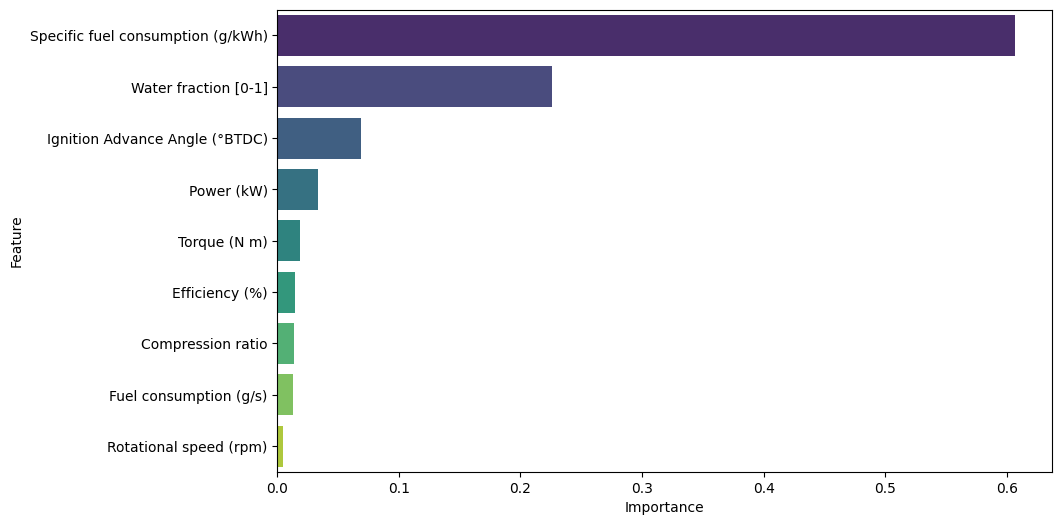

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_df2['Importance'], y=feature_df2['Feature'], palette='viridis')
plt.savefig('Emissions_Imp')

In [44]:
y_pred2 = model2.predict(X_test2)

# Evaluate the model
r22 = r2_score(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)

print(f"R² Score: {r22:.3f}")
print(f"MAE: {mae2:.3f}")
print(f"RMSE: {rmse2:.3f}")

R² Score: 0.910
MAE: 17.538
RMSE: 64.614


In [62]:
model2.predict([[water_fraction, Rotational_speed, Compression_ratio, BTDC,Torque,Fuel_consumption, Brake_Power,Specific_fuel_consumption,Efficiency]])

C:\Users\gaura\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[  0.51945667,   9.78243333,  14.37256667,  68.73433333,
        100.167     ]])

In [63]:
# CO (%),CO2 (%),O2 (%),HC (ppm),NOx (ppm)